<br>


<table style="width: 70%; border-collapse: collapse; border: none; margin-left:60px">
  <tr>
    <td style="width: 20%" align="center"> <img src="../assets/education-gem-notebooks_icon.png" alt="icon"  width="80%" ></td>
    <td> <h1 style="text-align: center;">CIG-GEM Education Notebook</h1>   
         <h1 style="text-align: center;">Basics of Mantle Dynamics</h1>
         <h2 style="text-align: center;">Foundational Level (L0)</h2>        
         <h3 style="text-align: center;">v0.1</h3>  </td>                        
  </tr>
</table>


<h4 style="margin-left:20px"><i> Authors: Jarett Baker-Dunn and Arushi Saxena with contributions from the CIG Education Working Group</h4>
<br>
<img src="../assets/cig-logo.png" alt="cig icon" width="10%">

[![License: GPLv3](https://img.shields.io/badge/License-GPLv3-blue)](LICENSE)

***
------------------------------

## Description

This module uses a community software ASPECT to describe the dominant mechanisms of heat transport inside the Earth's mantle—conduction and convection.

## Learning Objectives

###  Scientific
Upon completion of this module, you should be familiar with:
  * convection and conduction heat transport, and how the values of dimensionless numbers—Rayleigh number and Nusselt number—govern these transport mechanisms in the Earth's mantle.

### Technical
Upon completion of this module you should:
  * be able to run ASPECT from the command line,
  * understand the basic layout of model simulation file,
  * be able to visualize simulation results
  

## Prerequisites

This module does requires some basic knowledge of scientific computing and analysis, along with fundamentals of heat transport mechanisms inside the Earth.

## Table of Contents
 * [ASPECT and how to use it]()
 * [Understanding the simulation file]()
 * [Running and visualizing the model]()
 * [Rayleigh and Nusselt number]()

***
## Acknowledgements

Course materials are based on the tectonics modeling workshop 2020 led by ASPECT developers—Wolfgang Bangerth,
Juliane Dannberg, Menno Fraters, Rene Gassmoeller, Anne Glerum, Timo Heister, Bob Myhill, John Naliboff, and
Cedric Thieulot. The slides and the material are available in the [github repository](https://github.com/gassmoeller/aspect-tutorials).

 &nbsp;<div style="text-align: right">  
    &rarr; <b>NEXT: [Running the model](./1_running_ASPECT.ipynb) </b> <a href=""></a> &nbsp;&nbsp;
     <img src="../assets/education-gem-notebooks_icon.png" alt="icon"  style="width:4%">
  </div>

### Playtime: Convection in a 2D Box and the Rayleigh-Nusselt number

Consider a box heated from below and cooled from above, where convection transports heat from the bottom to the top. A reasonable assumption might be that if we had a less viscous fluid, we would have more vigorous convection and so more heat transported convectively. 
However, What matters physically is not actually the viscocity. Consider that:
- A cubic millimeter of honey will not convect for a temperature difference of 100K
- But a cubic kilometer of honey may
Also:
- A cubic kilometer of honey will not convect for a temperature difference of 0.1K
- But it may with a temperature difference of 100K
Thus, the expected degree of convection is described by the "Rayleigh Number:" $ Ra = \frac{{\rho}_{0}g{\alpha}{\Delta}TD^3}{{\eta}k}$

The mathematical statement of the above is therefore:
- Consider a box heated from below and cooled from above
    -> convection transports heat from bottom to top
- Reasonable assumption: Larger Rayleigh number -> More Vigorous convection -> More heat is transported convectively

Conductive heat transported is measured via the "Nusselt Number" (proportional to the surface heat flux). The Rayleigh number has a known empirical relationship with the Nusselt number, which is: $Nu \approx Ra^\frac{1}{3} $
Let's confirm this relationship by playing with one of the parameters (viscocity)!

These should be the model's current parameters: $\rho_{0}=3300, g= 9.81, \alpha=2*10^{-5},{\Delta}T=(3600-273)=3327,D=3*10^{6},k=4.7,c_{p}=1250, \kappa = \frac{k}{\rho_{0}c_{p}} $ 

These values are all found in the *tutorial.prm* input file. In the *subsection Material model* region of the input file, you can also specify the viscocity:

We will also need some functions from the [aspect_data.py](https://github.com/geodynamics/aspect/blob/main/contrib/python/scripts/aspect_data.py) and the [aspect-input.py](https://github.com/geodynamics/aspect/blob/main/contrib/python/scripts/aspect_input.py) scripts. In order to make sure that this notebook is self-contained, we will define those functions within the notebook rather than importing them from the aspect_data.py script:

The statistics file includes when visualization files have been created. If they have been written as gnuplot files, then we can read them and plot them.

In the example case, the grid is a column of 1 cell width. So the output can be plotted as 1D variable.

In [39]:
# we remove the values from data with NaN in the visualization file name column
data = data.dropna(subset=["Visualization file name"])

# we store the values for the file names and the associated time. 
visu_files = data["Visualization file name"].values
visu_times = data["Time (years)"].values

df = read_gnuplot_visu(visu_files[4]+".0000.gnuplot")
print(df.head())


          x         y  velocity_x  velocity_y             p        T  density  \
0       0.0       0.0    0.000000    0.000000  9.369380e+10  3600.00  3081.74   
1  262500.0       0.0   -0.000122    0.000000  9.370270e+10  3600.00  3081.74   
2  525000.0       0.0   -0.000239    0.000000  9.371160e+10  3600.00  3081.74   
3       0.0  187500.0    0.000000    0.000087  8.800590e+10  3475.51  3089.95   
4  262500.0  187500.0   -0.000120    0.000086  8.801440e+10  3473.27  3090.10   

   thermal_expansivity  specific_heat     viscosity  
0              0.00002           1250  5.104520e+24  
1              0.00002           1250  5.104520e+24  
2              0.00002           1250  5.104520e+24  
3              0.00002           1250  5.104520e+24  
4              0.00002           1250  5.104520e+24  


Now, lets plot the velocity on a structured grid:

(0.0, 1.0)

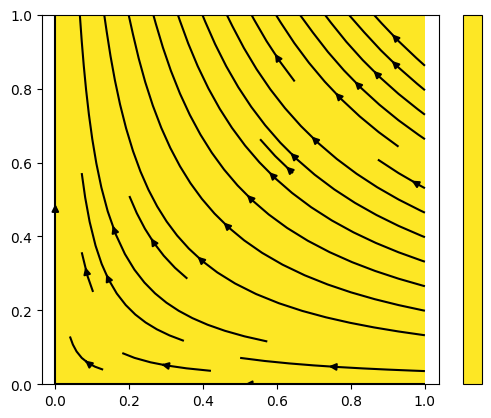

In [48]:
fig, ax = plt.subplots()

# define grid.
xi = np.linspace(0, 1, 100)
yi = np.linspace(0, 1, 100)
xi, yi = np.meshgrid(xi, yi)

# interpolate the values on the grid for the temperature.
Ti = griddata((x, y), t, (xi, yi))
# contour the gridded data, plotting dots at the nonuniform data points.
#CS = plt.contour(xi, yi, Ti, 15, linewidths=0.5, colors='k')
CS = ax.contourf(xi, yi, Ti, 15,
                  vmax=1., vmin=0.)
fig.colorbar(CS, ax=ax, ticks=[0, 0.5, 1])

# grid the velocities
vx, vy = df["velocity_x"].values, df["velocity_y"].values
Vxi = griddata( (x, y), vx, (xi, yi))
Vyi = griddata( (x, y), vy, (xi, yi))
ax.streamplot(xi, yi, Vxi, Vyi, density=[0.5,0.5], color='k')

ax.axis('equal')  # force the x and y axes to have the same scale
ax.set_xlim([0,1])
ax.set_ylim([0,1])
ax.axis('off') # remove the axes and ticks